In [34]:
%load_ext autoreload
%autoreload 2
import numpy as np
import QLearningAlgo as Q
import DoubleQ as dQ

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Variation du $beta$

Valeurs de beta testées : 
  0.0002(Collusion-Nash rapide), 0.0001(Collusion-Nash rapide), 0.00001 (Collusion lent), 0.000005 
  Intuition : Plus le epsilon tend vite vers 0 (beta grand), plus on optimise, plus les profits vont être ceux de Nash
  Il y aura une valeur de beta moyenne pour lequelle il y aura collusion 
  Si epsilon trop proche de 1, tend vers 0 trop lentement (beta très petit) il n'y aura pas de stratégie (tout le temps action aléatoire)

In [3]:

beta = 0.00001
total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(beta=beta)
    agent2 = tst.Agent(beta=beta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)
    
    

0
1
2


In [4]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

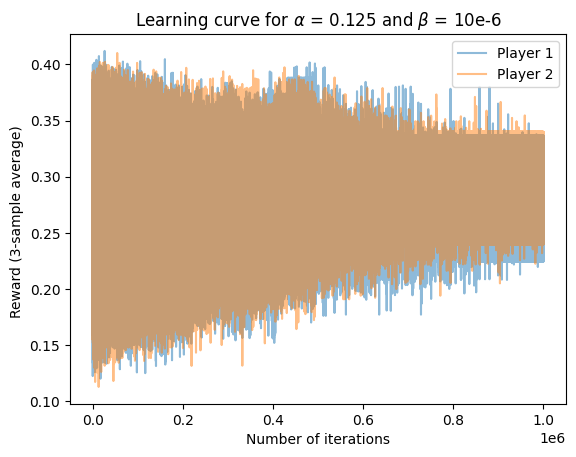

In [5]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125 and $\\beta$ = 10e-6')
plt.legend(loc='upper right')
plt.show()


In [9]:
beta = 0.0001
total_reward1_bis = []
total_reward2_bis = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(beta=beta)
    agent2 = tst.Agent(beta=beta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1_bis.append(reward1)
    total_reward2_bis.append(reward2)

0
1
2


In [10]:
aggregated_agent1_bis = np.array(total_reward1_bis).mean(axis=0)
aggregated_agent2_bis = np.array(total_reward2_bis).mean(axis=0)

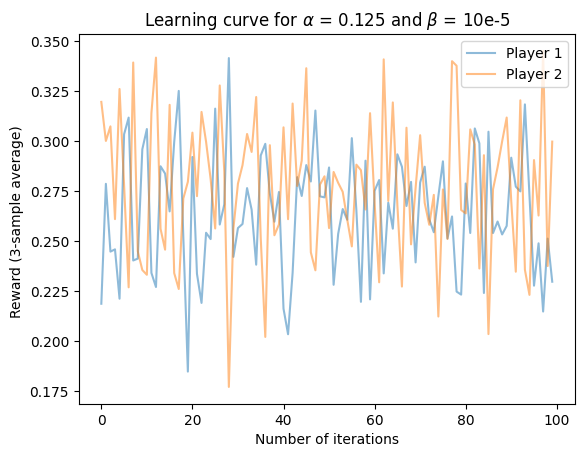

In [20]:
plt.plot(aggregated_agent1_bis[-100:], alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2_bis[-100:], alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125 and $\\beta$ = 10e-5')
plt.legend(loc='upper right')
plt.show()

In [12]:
beta = 0.0002
total_reward1_ter = []
total_reward2_ter = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(beta=beta)
    agent2 = tst.Agent(beta=beta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1_ter.append(reward1)
    total_reward2_ter.append(reward2)

0
1
2


In [13]:
aggregated_agent1_ter = np.array(total_reward1_ter).mean(axis=0)
aggregated_agent2_ter = np.array(total_reward2_ter).mean(axis=0)

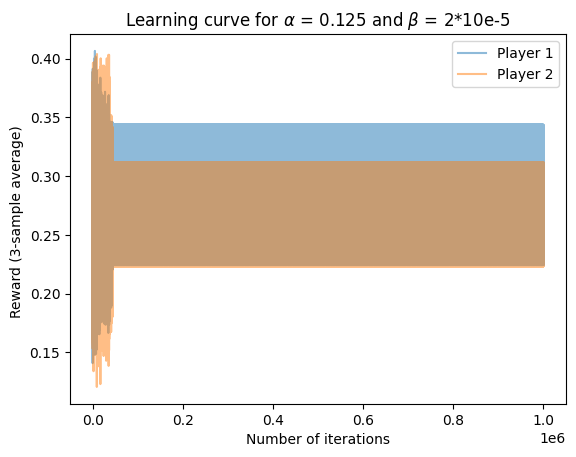

In [15]:
plt.plot(aggregated_agent1_ter, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2_ter, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125 and $\\beta$ = 2*10e-5')
plt.legend(loc='upper right')
plt.show()

In [16]:
beta = 0.001
total_reward1_10em4 = []
total_reward2_10em4 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(beta=beta)
    agent2 = tst.Agent(beta=beta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1_10em4.append(reward1)
    total_reward2_10em4.append(reward2)

0
1
2


In [17]:
aggregated_agent1_10em4 = np.array(total_reward1_10em4).mean(axis=0)
aggregated_agent2_10em4 = np.array(total_reward2_10em4).mean(axis=0)

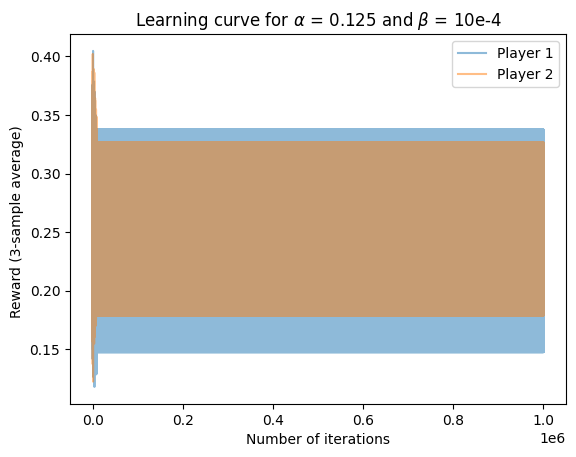

In [19]:
plt.plot(aggregated_agent1_10em4, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2_10em4, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125 and $\\beta$ = 10e-4')
plt.legend(loc='upper right')
plt.show()

## Variation du $delta$

### $delta$=0.95

In [ ]:
total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(beta=beta)
    agent2 = tst.Agent(beta=beta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

In [24]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [29]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)


0.5297090079244001
0.647495532775653


0.28826799087168403

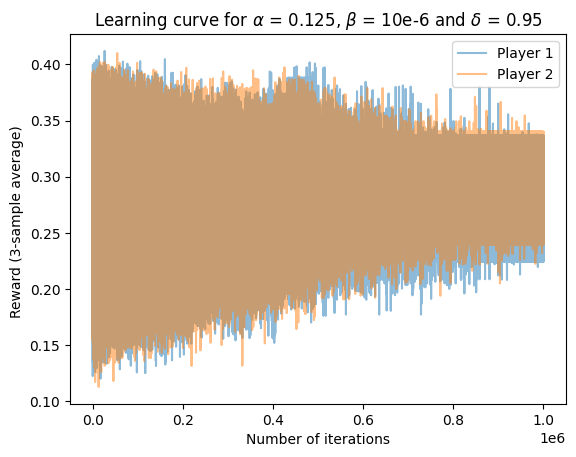

In [25]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-6 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()

In [11]:
delta = 0.85
total_reward1delta085 = []
total_reward2delta085 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(delta=delta)
    agent2 = tst.Agent(delta=delta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2= []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1delta085.append(reward1)
    total_reward2delta085.append(reward2)

0
1
2


In [41]:
aggregated_agent1 = np.array(total_reward1delta085).mean(axis=0)
aggregated_agent2 = np.array(total_reward2delta085).mean(axis=0)

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_998/4268409553.py:2: RuntimeWarning: Mean of empty slice.
  aggregated_agent2 = np.array(total_reward2delta085).mean(axis=0)


In [42]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

IndexError: invalid index to scalar variable.

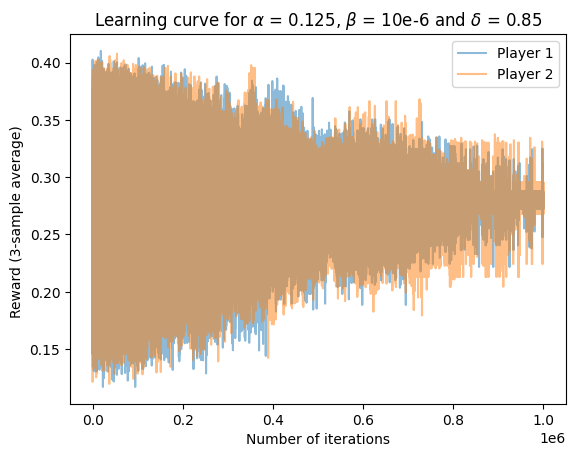

In [13]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-6 and $\\delta$ = 0.85')
plt.legend(loc='upper right')
plt.show()

In [15]:
delta = 0.75
total_reward1delta075 = []
total_reward2delta075 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(delta=delta)
    agent2 = tst.Agent(delta=delta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2= []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1delta075.append(reward1)
    total_reward2delta075.append(reward2)

0
1
2


In [34]:
aggregated_agent1 = np.array(total_reward1delta075).mean(axis=0)
aggregated_agent2 = np.array(total_reward2delta075).mean(axis=0)

In [35]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

0.5973706643051556
0.22693045309397916


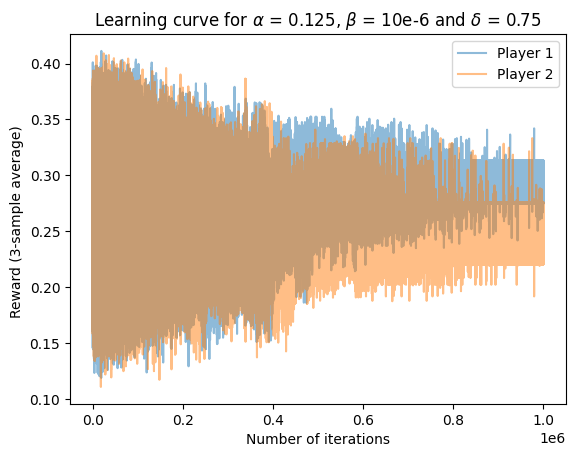

In [17]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-6 and $\\delta$ = 0.75')
plt.legend(loc='upper right')
plt.show()

In [18]:
delta = 0.55
total_reward1delta055 = []
total_reward2delta055 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(delta=delta)
    agent2 = tst.Agent(delta=delta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2= []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1delta055.append(reward1)
    total_reward2delta055.append(reward2)

0
1
2


In [36]:
aggregated_agent1 = np.array(total_reward1delta055).mean(axis=0)
aggregated_agent2 = np.array(total_reward2delta055).mean(axis=0)

In [37]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

0.2904943013198478
0.3690189015378292


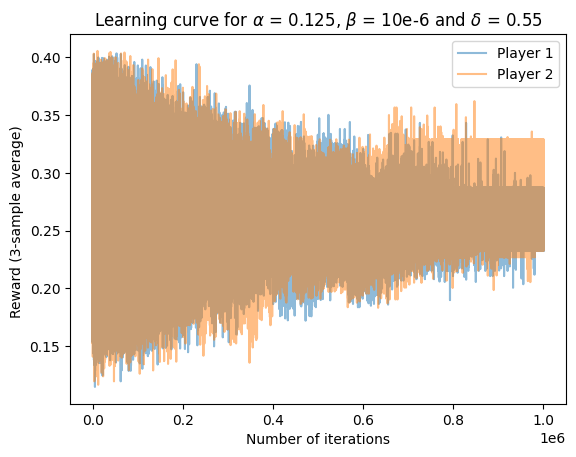

In [20]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-6 and $\\delta$ = 0.55')
plt.legend(loc='upper right')
plt.show()

In [21]:
delta = 0.35
total_reward1delta035 = []
total_reward2delta035 = []
for loop in range(3):
    print(loop)
    agent1 = tst.Agent(delta=delta)
    agent2 = tst.Agent(delta=delta)
    env = tst.Env()
    
    temps = []
    reward1 = []
    reward2= []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1delta035.append(reward1)
    total_reward2delta035.append(reward2)

0
1
2


In [38]:
aggregated_agent1 = np.array(total_reward1delta035).mean(axis=0)
aggregated_agent2 = np.array(total_reward2delta035).mean(axis=0)

In [39]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

0.15743292943869824
0.1645757235973955


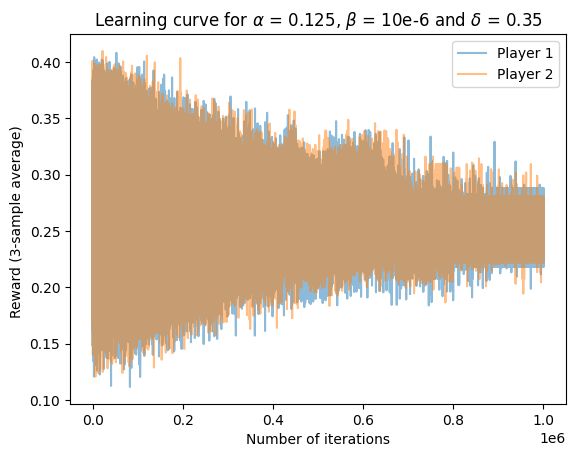

In [23]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-6 and $\\delta$ = 0.35')
plt.legend(loc='upper right')
plt.show()

# replication of the results 

In [36]:
total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = Q.Agent()
    agent2 = Q.Agent()
    env = Q.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

0


In [ ]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [ ]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-5 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()

big profit

In [ ]:
alpha = 0.025
beta = 10**(-6)
total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = Q.Agent()
    agent2 = Q.Agent()
    env = Q.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

In [ ]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [ ]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.025, $\\beta$ = 10e-6 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()

Little profit

In [ ]:
alpha = 0.2
beta = 10**(-6)
total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = Q.Agent()
    agent2 = Q.Agent()
    env = Q.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

In [ ]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [ ]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.2, $\\beta$ = 10e-6 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()

# Double Q-learning

In [20]:

total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = dQ.Agent()
    agent2 = dQ.Agent()
    env = dQ.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

0
1
2


In [21]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [22]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

0.49376994234462923
0.5120979048343912


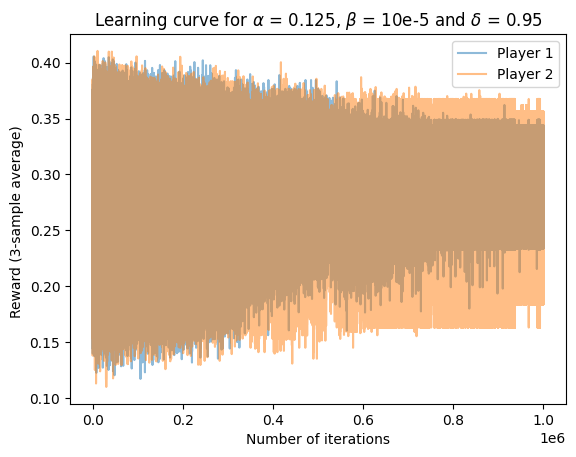

In [23]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.125, $\\beta$ = 10e-5 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()

Big Profit

In [25]:
alpha = 0.025
beta = 10**(-6)
total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = dQ.Agent()
    agent2 = dQ.Agent()
    env = dQ.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

0
1
2


In [26]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [27]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

0.5509207340142488
0.6789872381730214


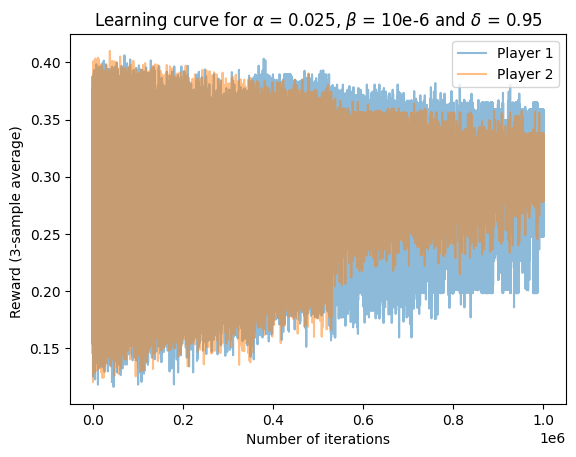

In [28]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.025, $\\beta$ = 10e-6 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()

In [29]:
beta = 10**(-6)
alpha = 0.2

total_reward1 = []
total_reward2 = []
for loop in range(3):
    print(loop)
    agent1 = dQ.Agent(alpha=alpha, beta=beta)
    agent2 = dQ.Agent(alpha=alpha, beta=beta)
    env = dQ.Env()
    
    temps = []
    reward1 = []
    reward2 = []
    epsilon = []
    prices1 = []
    prices2 = []

    #1) On initialise p0 (on va le faire direct dans agent)
    agent1.p = np.random.choice(agent1.A)
    agent2.p = np.random.choice(agent2.A)
    #Initialisation de l'etat
    #s_t
    s_t = env([agent1.p,agent2.p])[1]
    agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
    agent2.s_t = s_t

    s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
    agent1.s_ind = s_ind
    agent2.s_ind = s_ind


    #Phase itérative
    for t in range(1000000):
    #Action et état t+1
        #a_t
        agent1.a_ind = agent1.get_next_action()
        agent2.a_ind = agent2.get_next_action()
    
        #s_t+1
        s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
        agent1.s_t1 = s_t1
        agent2.s_t1 = s_t1
    
        s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
        agent1.s_ind1 = s_ind1 
        agent2.s_ind1 = s_ind1
   
        #Alimenter vecteurs temps et reward
        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret
        
        re = ret[0]*ret[1]-ret[0]*ret[2]
        reward1.append(re[0])
        reward2.append(re[1])
        epsilon_value = agent1.epsilon
        epsilon.append(epsilon_value)
        prices1.append(agent1.p)
        prices2.append(agent2.p)
    
    
    
        #Les updates pour le prochain tour 
    
        agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
        agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
    total_reward1.append(reward1)
    total_reward2.append(reward2)

0
1
2


In [30]:
aggregated_agent1 = np.array(total_reward1).mean(axis=0)
aggregated_agent2 = np.array(total_reward2).mean(axis=0)

In [31]:
RN = 0.23
RM = 0.34
Rmean1 = aggregated_agent1[-100:].mean()
Rmean2 = aggregated_agent2[-100:].mean()
DRmean1 = (Rmean1 - RN)/(RM - RN) 
DRmean2 = (Rmean2 - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

0.19404676806275276
0.3037822503723326


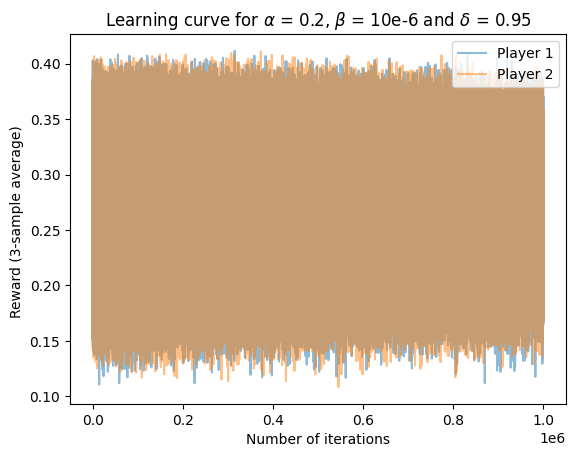

In [33]:
import matplotlib.pyplot as plt
plt.plot(aggregated_agent1, alpha=0.5, label = 'Player 1')
plt.plot(aggregated_agent2, alpha=0.5, label = 'Player 2')
plt.xlabel('Number of iterations')
plt.ylabel('Reward (3-sample average) ')
plt.title('Learning curve for $\\alpha$ = 0.2, $\\beta$ = 10e-6 and $\\delta$ = 0.95')
plt.legend(loc='upper right')
plt.show()